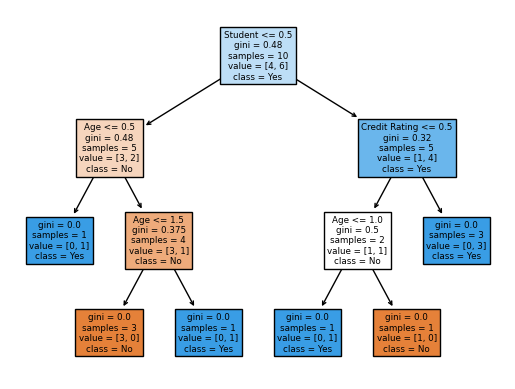

Accuracy: 1.0
Predicted class for the individual: Yes


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('1.csv')


# 1.1) Convert the categorical dataset into numerical format
les = {col: LabelEncoder() for col in df.columns}
for col in df.columns:
    df[col] = les[col].fit_transform(df[col])

# 1.2) Build a Decision Tree Classifier using the scikit-learn library
model = DecisionTreeClassifier()


# 1.3) Train the decision tree on the given dataset
X = df.drop('Buys Computer', axis=1)
y = df['Buys Computer']

model.fit(X, y)


# 1.4) Visualize the decision tree
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.savefig('1.png', bbox_inches='tight')
plt.show()


# 2) Use the trained decision tree to predict whether the following individual will buy a computer or not:
# Age: 35; Income: Medium; Student: No; Credit Rating: Excellent
X_new = pd.DataFrame({'Age': ['31...40'], 'Income': ['Medium'], 'Student': ['No'], 'Credit Rating': ['Excellent']})
X_new = X_new.apply(lambda x: les[x.name].transform(x))

new_pred = model.predict(X_new)
new_pred = les['Buys Computer'].inverse_transform(new_pred)


# 3) Print the accuracy of the decision tree model and the predicted class for the individual
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Predicted class for the individual: {new_pred[0]}')

%%latex

\vspace{1000pt}

\begin{center}
\Huge \textbf{Question 2}
\end{center}

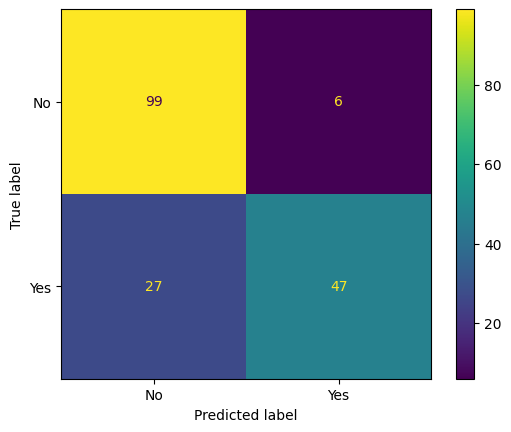

Accuracy: 0.8156424581005587
Predicted survival for the new passenger: 1


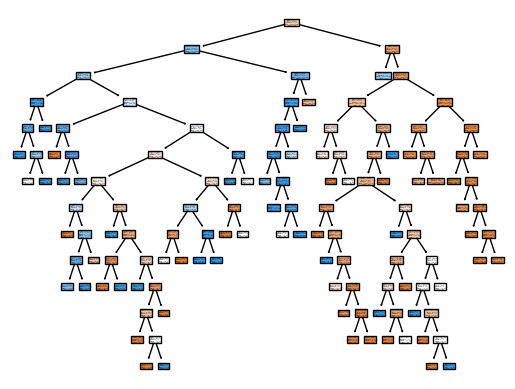

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 500


# 1) Use the Titanic dataset available from seaborn library in Python
df = sns.load_dataset('titanic')
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])


# 2) Split the dataset into training and testing sets (80/20)
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 3) Train a decision tree model using scikit-learn
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


# 4) Evaluate the model using accuracy and confusion matrix
acc = accuracy_score(y_test, clf.predict(X_test))
cm  = confusion_matrix(y_test, clf.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes']).plot()
plt.savefig('2-1.png', bbox_inches='tight')
plt.show()
print(f'Accuracy: {acc}')


# 5) Predict the survival for a new passenger with the following attributes:
# Class:1st; Sex:Female; Age:25; Fare:100
X_new = pd.DataFrame({'pclass': [1], 'sex': le.transform(['female'])[0], 'age': [25], 'fare': [100]})
new_pred = clf.predict(X_new)
print(f'Predicted survival for the new passenger: {new_pred[0]}')


# 6) Visualize the decision tree
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.savefig('2-2.png', bbox_inches='tight')
plt.show()

%%latex

\vspace{1000pt}

\begin{center}
\Huge \textbf{Question 3}
\end{center}

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('3.csv')


# 1) Preprocess the dataset (handle missing values and encode categorical variables)
cols = ['Education', 'Marital Status', 'Credit History', 'Loan Approved']
les  = {col: LabelEncoder() for col in cols}
for col in cols:
    df[col] = les[col].fit_transform(df[col])
# As we can see in the below output, we don't have any missing values in the dataset
print(pd.isna(df).sum())


# 2) Train a decision tree model on the dataset
X = df.drop('Loan Approved', axis=1)
y = df['Loan Approved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


# 3) Test the model using a test dataset and evaluate its accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')


# 4) Predict whether a loan will be approved for a new applicant with the following details:
# Income: 50000; Loan Amount: 200000; Education: Graduate; Marital Status: Married; Credit History: Good
X_new = pd.DataFrame({'Income': [50000], 'Loan Amount': [200000], 'Education': ['Graduate'], 'Marital Status': ['Married'], 'Credit History': ['Good']})
for col in cols[:-1]:
    X_new[col] = les[col].transform(X_new[col])

new_pred = model.predict(X_new)
new_pred = les['Loan Approved'].inverse_transform(new_pred)
print(f'Predicted loan approval for the new applicant: {new_pred[0]}')

Income            0
Loan Amount       0
Education         0
Marital Status    0
Credit History    0
Loan Approved     0
dtype: int64
Accuracy: 1.0
Predicted loan approval for the new applicant: Yes


<br><br><br>